In [1]:
!pip install nltk
!pip install wordcloud

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import os
#BNLP PACKAGES
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
#modelling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize']=14,6
plt.style.use('ggplot')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
amazon_reviews=pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')
amazon_reviews.head(3)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


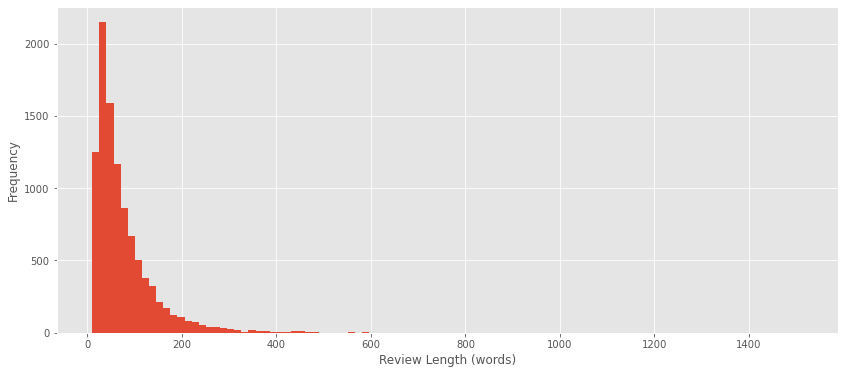

In [7]:
words_per_review=amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins=100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [8]:
print('Average words:'words_per_review.mean())
print('Skewness:',words_per_review.skew())

SyntaxError: invalid syntax (<ipython-input-8-a6d0e4baaec7>, line 1)

In [9]:
percent_val=100*amazon_reviews['Score'].value_counts()/len(amazon_reviews)
percent_val

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

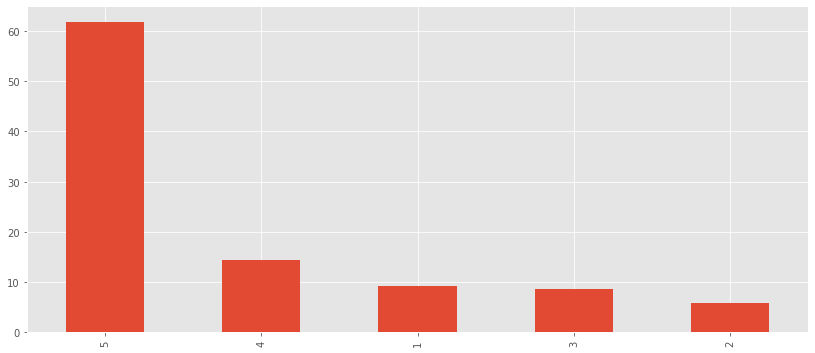

In [10]:
percent_val.plot.bar()
plt.show()

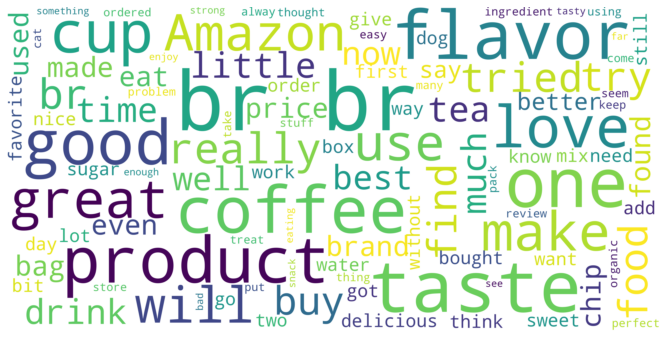

In [11]:
word_cloud_text=''.join(amazon_reviews['Text'])
wordcloud=WordCloud(max_font_size=100,
                   max_words=100,
                   background_color='White',
                   scale=10,
                   width=800,
                   height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
amazon_reviews['Sentiment_rating']=np.where(amazon_reviews.Score>3,1,0)
amazon_reviews=amazon_reviews[amazon_reviews.Score !=3]
amazon_reviews['Sentiment_rating'].value_counts()

1    7616
0    1522
Name: Sentiment_rating, dtype: int64

In [13]:
amazon_reviews['reviews_text_new']=amazon_reviews['Text'].str.lower()

In [14]:
nltk.download('punkt')
from nltk import word_tokenize
word_tokenize("Dphi Bootcamp rules. It is awesome:D")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Dphi', 'Bootcamp', 'rules', '.', 'It', 'is', 'awesome', ':', 'D']

In [15]:
token_lists=[word_tokenize(each) for each in amazon_reviews['Text']]
tokens=[item for sublist in token_lists for item in sublist]
print("Number of unique tokens then:",len(set(tokens)))
token_lists_lower=[word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens_lower=[item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now:",len(set(tokens_lower)))

Number of unique tokens then: 27504
Number of unique tokens now: 22470


In [16]:
#selecting non alpha numeric characters that rae spaces
spl_chars=amazon_reviews['reviews_text_new'].apply(lambda review:
                                                  [char for char in list(review) if not char.isalnum() and char !=' '])
#getting list of list into single list
flat_list=[item for sublist in spl_chars for item in sublist]
##unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

In [17]:
review_backup=amazon_reviews['reviews_text_new'].copy()
amazon_reviews['reviews_text_new']=amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9]+',' ')

In [18]:
print("-Old review")
print(review_backup.values[6])
print("\n-New Review")
print(amazon_reviews['reviews_text_new'][6])

-Old review
this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!

-New Review
this saltwater taffy had great flavors and was very soft and chewy each candy was individually wrapped well none of the candies were stuck together which did happen in the expensive version fralinger s would highly recommend this candy i served it at a beach themed party and everyone loved it 


In [19]:
token_lists=[word_tokenize(each) for each in amazon_reviews['Text']]
tokens=[item for sublist in token_lists for item in sublist]
print("Number of unique tokens then:",len(set(tokens)))
token_lists=[word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens=[item for sublist in token_lists for item in sublist]
print("Number of unique tokens now:",len(set(tokens)))

Number of unique tokens then: 27504
Number of unique tokens now: 18039


In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print('Available langauges for NLTK v.3.4.5:')
print(stopwords.fileids())

Available langauges for NLTK v.3.4.5:
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
noise_words=[]
eng_stop_words=stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
#removing stop words
stop_words=set(eng_stop_words)
without_stop_words=[]
stopword=[]
sentence=amazon_reviews['reviews_text_new'][0]
words=nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)
print('__original sentence__\n',sentence)
print('\n__Stopwords in the sentence__\n',stopword)
print('\n__non-stopwords in the sentence__\n',without_stop_words)

__original sentence__
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most 

__Stopwords in the sentence__
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

__non-stopwords in the sentence__
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [24]:
def stopwords_removal(stop_words,sentence):
    return[word for word in nltk.word_tokenize(sentence) if word not in stop_words]
amazon_reviews['reviews_text_nonstop']=amazon_reviews['reviews_text_new'].apply(lambda row:stopword)
amazon_reviews[['reviews_text_new','reviews_text_nonstop']]


,reviews_text_new,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[i, have, of, the, and, have, them, all, to, b..."
1,product arrived labeled as jumbo salted peanut...,"[i, have, of, the, and, have, them, all, to, b..."
2,this is a confection that has been around a fe...,"[i, have, of, the, and, have, them, all, to, b..."
3,if you are looking for the secret ingredient i...,"[i, have, of, the, and, have, them, all, to, b..."
4,great taffy at a great price there was a wide ...,"[i, have, of, the, and, have, them, all, to, b..."
...,...,...
9995,we switched from the advance similac to the or...,"[i, have, of, the, and, have, them, all, to, b..."
9996,like the bad reviews say the organic formula c...,"[i, have, of, the, and, have, them, all, to, b..."
9997,i wanted to solely breastfeed but was unable t...,"[i, have, of, the, and, have, them, all, to, b..."
9998,i love the fact that i can get this delieved t...,"[i, have, of, the, and, have, them, all, to, b..."


In [25]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
porter=PorterStemmer()
lancaster=LancasterStemmer()
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [27]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))
#provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble",wordnet.NOUN))
print(lemmatizer.lemmatize("troubling",wordnet.VERB))
print(lemmatizer.lemmatize("troubled",wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [28]:
#machine learning model
amazon_reviews[['Text','Score','Sentiment_rating']].head(5)

,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


In [29]:
from nltk import ngrams
sentence='A bird in the hand worths two in the bush'
for n in range(1,6):
    print(str(n)+'-grams:\n',list(ngrams(sentence.split(),n)))

1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]
5-grams:
 [('A', 'bird', 'in', 'the', 'hand'), ('bird', 'in', 'the', 'hand', 'worths'), ('in', 'the', 'hand', 'worths', 'two'), ('the', 'hand', 'worths', 'two', 'in'), ('hand', 'worths', 'two', 'in', 'the'), ('worths', 'two', 'in', 'the', 'bush')]


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
x=vec.fit_transform(amazon_reviews['reviews_text_new'])
df=pd.DataFrame(x.toarray(),columns=vec.get_feature_names())
df.head()

,00,000,0003,000kwh,002,008,0100,0174,02,03,...,zomg,zon,zoo,zoom,zotz,zucchini,zuke,zukes,zupas,zuppa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bow_counts=CountVectorizer(tokenizer=word_tokenize,#type of tokenization
                          stop_words=noise_words,#list of stopwords
                          ngram_range=(1,1))#number of n-grams
bow_data=bow_counts.fit_transform(amazon_reviews['reviews_text_new'])

In [32]:
bow_data

<9138x18039 sparse matrix of type '<class 'numpy.int64'>'
	with 493450 stored elements in Compressed Sparse Row format>

In [34]:
x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,#features
                                        amazon_reviews['Sentiment_rating'],#target variable
                                        test_size=0.2,#20% test_size
                                        random_state=0)

In [35]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.847921
0    0.152079
Name: Sentiment_rating, dtype: float64

In [36]:
#training the model
lr_model_all=LogisticRegression()
lr_model_all.fit(x_train_bow,y_train_bow)
test_pred_lr_all=lr_model_all.predict(x_test_bow)#predicting output
#calculate key perfomance metrics
print("F1 score:",f1_score(y_test_bow,test_pred_lr_all))

F1 score: 0.9526854219948849


In [37]:
bow_counts=CountVectorizer(tokenizer=word_tokenize,
                          ngram_range=(1,4))
bow_data=bow_counts.fit_transform(amazon_reviews.reviews_text_new)

In [38]:
bow_data

<9138x1261413 sparse matrix of type '<class 'numpy.int64'>'
	with 2530528 stored elements in Compressed Sparse Row format>

In [39]:
x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,
                                                              amazon_reviews['Sentiment_rating'],
                                                              test_size=0.2,
                                                              random_state=0)

In [40]:
#defining and training the model
lr_model_all_new=LogisticRegression(max_iter=200)
lr_model_all_new.fit(x_train_bow,y_train_bow)
#predicting the results
test_pred_lr_all=lr_model_all_new.predict(x_test_bow)
print("F1 score:", f1_score(y_test_bow,test_pred_lr_all))

F1 score: 0.9541745134965474


In [43]:
lr_weights=pd.DataFrame(list(zip(bow_counts.get_feature_names(),#get all the ngram feature names
                                lr_model_all_new.coef_[0])),#get logistic regresion coefficient
                        columns=['words','weights'])#defining column names
lr_weights.sort_values(['weights'],ascending=False)[:15]

,words,weights
448809,great,1.327839
305794,delicious,0.952224
810997,perfect,0.838265
438773,good,0.831886
1023733,the best,0.820460
358331,excellent,0.820378
171393,best,0.792758
639088,love,0.783708
709971,nice,0.769273
930961,smooth,0.637406


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts=TfidfVectorizer(tokenizer=word_tokenize,
                          stop_words=noise_words,
                          ngram_range=(1,1))
tfidf_data=tfidf_counts.fit_transform(amazon_reviews['reviews_text_new'])

In [48]:
tfidf_data

<9138x18039 sparse matrix of type '<class 'numpy.float64'>'
	with 493450 stored elements in Compressed Sparse Row format>

In [49]:
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(tfidf_data,
                                                              amazon_reviews['Sentiment_rating'],
                                                              test_size=0.2,
                                                              random_state=0)